# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [174]:
import glob
import os
import re
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from IPython.display import display
from calendar import monthrange
sns.set_context('notebook')
sns.set()
np.set_printoptions(threshold='nan')

In [260]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [336]:
def pretty_pie(title, vals, lbls, num_colors=10):

    rcParams['axes.titlepad'] = 20 
    rcParams['figure.figsize'] = 7, 7
    sns.set_palette("Set2", num_colors, 1.0)

    exp = list()

    i=0
    for k in lbls:
        exp.append(0.015 * i**2)
        i+=1
    
    patches, text, autotext = plt.pie(vals, labels=lbls, explode=exp, pctdistance=0.8, textprops={'fontsize':14}, autopct='%1.1f%%', shadow=False, startangle=0)

    for t in text:
        t.set_fontsize(14)

    plt.title(title, 
              horizontalalignment='center',
              fontsize=20, 
              style='oblique', 
              weight='bold', 
              variant='small-caps')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show();

In [427]:
def pretty_bar(vals, xlabels, xtitle, ytitle, width=0.6, figwidth=5):
    rcParams['figure.figsize'] = figwidth, 5
    plt.bar(range(len(xlabels)), vals, tick_label=xlabels, width=width, align='center')
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.grid(axis='x')
    plt.show()

In [13]:
DATA_FOLDER = 'Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

## Solution
We first load the csv files for each country

In [14]:
path_guinea = DATA_FOLDER + '/ebola/guinea_data/' 
path_liberia = DATA_FOLDER + '/ebola/liberia_data/'
path_sierraleone = DATA_FOLDER + '/ebola/sl_data/'

# There should be 22 files for Guinea
all_guinea_files = glob.glob(os.path.join(path_guinea, "*.csv"))    
print('Found '+str(len(all_guinea_files))+' csv files for Guinea')

# There should be 100 files for Liberia
all_liberia_files = glob.glob(os.path.join(path_liberia, "*.csv"))
print('Found '+str(len(all_liberia_files))+' csv files for Liberia')

# There should be 103 files for Sierra Leone
all_sierraleone_files = glob.glob(os.path.join(path_sierraleone, "*.csv"))
print('Found '+str(len(all_sierraleone_files))+' csv files for Sierra Leone')


guinea_df = pd.concat((pd.read_csv(f) for f in all_guinea_files), ignore_index=True)
liberia_df = pd.concat((pd.read_csv(f) for f in all_liberia_files), ignore_index=True)
sierraleone_df = pd.concat((pd.read_csv(f) for f in all_sierraleone_files), ignore_index=True)

Found 22 csv files for Guinea
Found 100 csv files for Liberia
Found 103 csv files for Sierra Leone


We take a look to see how the columns are organized. We see that the event description does not have the same name in the 3 countries. Therefore we rename the corresponding columns so that we can properly concatenate. 

In [15]:
idx = pd.date_range('06-01-2014', '12-30-2014')

In [16]:
guinea_data = guinea_df.copy()
guinea_data.Date = pd.to_datetime(guinea_data.Date)

with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    print(guinea_data[['Date', 'Description', 'Totals']].head())

guinea_data = guinea_data[['Date', 'Description', 'Totals']]
guinea_data.Description = guinea_data.Description.str.lower()

death_regexp = re.compile('(?!total)(?!number)(?!cumulative)(?!.*etc).*death.*')
newcase_regexp = re.compile('(?!total)(?!cumulative)(?!.*cum)(?!.*_cum_)' +
               '(?!.*cfr)(?!.*corpse)(?!.*admission)(?!.*sample)(?!pending)(?!percent)'+
               '(?!population)(?!.*noncase)(?!specimen)(?!.*follow-up)(?!.*number)'+
               '(?!.*cte)(?!.*etc)(?!.*rate)(?!.*contact)(?!.*negative)(?!.*death)')

print('')
print(set(guinea_data.Description[guinea_data.Description.str.match(death_regexp)]))
print('')
print(set(guinea_data.Description[guinea_data.Description.str.match(newcase_regexp)]))

guinea_data_deaths = guinea_data[guinea_data.Description.str.match(death_regexp)][['Date', 'Totals']]
guinea_data_cases = guinea_data[guinea_data.Description.str.match(newcase_regexp)][['Date', 'Totals']]

guinea_data_deaths = guinea_data_deaths.set_index('Date')
guinea_data_cases = guinea_data_cases.set_index('Date')
guinea_data_deaths.columns = ['Registered new deaths']
guinea_data_cases.columns = ['Registered new cases']

guinea_data_cases = guinea_data_cases.astype(float)
guinea_data_deaths = guinea_data_deaths.astype(float)
guinea_data_deaths

        Date                        Description Totals
0 2014-08-04              New cases of suspects      5
1 2014-08-04             New cases of probables      0
2 2014-08-04             New cases of confirmed      4
3 2014-08-04  Total new cases registered so far      9
4 2014-08-04            Total cases of suspects     11

{'new deaths registered today', 'new deaths registered', 'new deaths registered today (probables)', 'new deaths registered among health workers', 'new deaths registered today (suspects)', 'new deaths registered today (confirmed)'}

{'new cases of suspects', 'new cases of confirmed', 'new cases of confirmed among health workers', 'new cases of probables'}


,Registered new deaths
Date,
2014-08-04,2.0
2014-08-04,2.0
2014-08-04,0.0
2014-08-04,0.0
2014-08-26,5.0
2014-08-26,0.0
2014-08-27,2.0
2014-08-27,0.0
2014-08-30,5.0


In [17]:
guinea_data_cases = guinea_data_cases.groupby(guinea_data_cases.index).sum()
guinea_data_deaths = guinea_data_deaths.groupby(guinea_data_deaths.index).sum()

guinea_data = guinea_data_cases.merge(guinea_data_deaths, left_index=True, right_index=True, how='outer')

guinea_data = guinea_data.reindex(idx, fill_value=0)
guinea_data.index = guinea_data.index.month

guinea_data=guinea_data.groupby(guinea_data.index).mean()
guinea_data

,Registered new cases,Registered new deaths
6,0.00000,0.000000
7,0.00000,0.000000
8,4.16129,0.612903
9,10.70000,1.900000
10,1.16129,0.483871
11,0.00000,0.000000
12,0.00000,0.000000


#### Note:
New cases field sometimes indicate cumulative values. 

In [18]:
liberia_df = liberia_df.rename(columns = {'Variable' : 'Description'})
liberia_df.Date = pd.to_datetime(liberia_df.Date)

liberia_data = liberia_df.copy()
liberia_data.Date = pd.to_datetime(liberia_data.Date)

liberia_data = liberia_data[['Date', 'Description', 'National']]
liberia_data.head()

liberia_data.Description = liberia_data.Description.str.lower()
liberia_data.National = liberia_data.National.astype(float)

death_regexp = re.compile('.*death.*')
case_regexp = re.compile('(?!.*death)(?!.*rate).*case')

liberia_deaths_data = liberia_data[liberia_data.Description.str.match(death_regexp)]
liberia_cases_data = liberia_data[liberia_data.Description.str.match(case_regexp)]
print(set(liberia_cases_data.Description))

liberia_deaths_data = liberia_deaths_data[['Date', 'National']]
liberia_cases_data = liberia_cases_data[['Date', 'National']]

liberia_deaths_data.at[2679, 'National']= 0

liberia_deaths_data['Days in month'] = liberia_deaths_data.Date.dt.daysinmonth
liberia_cases_data['Days in month'] = liberia_cases_data.Date.dt.daysinmonth

liberia_deaths_data = liberia_deaths_data.groupby(liberia_deaths_data.Date.dt.month).max()
liberia_cases_data = liberia_cases_data.groupby(liberia_cases_data.Date.dt.month).max()

liberia_deaths_data['National'] = liberia_deaths_data['National'].diff().fillna(value=0)
liberia_cases_data['National'] = liberia_cases_data['National'].diff().fillna(value=0)

liberia_deaths_data.National /= liberia_deaths_data['Days in month']
liberia_cases_data.National /= liberia_cases_data['Days in month']

liberia_deaths_data = liberia_deaths_data[['National']]
liberia_cases_data = liberia_cases_data[['National']]

liberia_data = liberia_cases_data.merge(liberia_deaths_data, left_index=True, right_index=True, how='outer')
liberia_data.columns = ['Daily average reported new cases', 'Daily average reported deaths']
liberia_data.index.name = 'Month in year'
liberia_data

{'new case/s (probable)', 'total case/s (suspected)', 'new case/s (suspected)', 'total number of confirmed cases of sierra leonean nationality', 'new case/s (confirmed)', 'total number of confirmed cases of guinean nationality', 'total case/s (probable)', 'total confirmed cases', 'total suspected cases', 'total number of confirmed cases \n of sierra leonean nationality', 'total number of confirmed cases \n of guinean nationality', 'total case/s (confirmed)', 'total probable cases', 'cumulative confirmed, probable and suspected cases', 'cumulative cases among hcw', 'newly reported cases in hcw'}


,Daily average reported new cases,Daily average reported deaths
Month in year,,
6,0.000000,0.000000
7,2.290323,3.096774
8,20.612903,23.870968
9,31.933333,39.100000
10,155.290323,22.967742
11,37.600000,12.900000
12,4.645161,4.290323


#### Note:
Sometimes cumulative values increase while there are no new cases declared

In [28]:
sierraleone_df = sierraleone_df.rename(columns = {'variable' : 'Description', 'date' : 'Date'})
sierraleone_df.Date = pd.to_datetime(sierraleone_df.Date)

sierraleone_data = sierraleone_df.copy()
sierraleone_data.Date = pd.to_datetime(sierraleone_data.Date)

sierraleone_data = sierraleone_data[['Date', 'Description', 'National']]
sierraleone_data.head()

sierraleone_data.Description = sierraleone_data.Description.str.lower()


death_regexp = re.compile('.*death.*')
case_regexp = re.compile('(?!.*death)(?!.*rate).*case.*')

sierraleone_deaths_data = sierraleone_data[sierraleone_data.Description.str.match(death_regexp)]
sierraleone_cases_data = sierraleone_data[sierraleone_data.Description.str.match(case_regexp)]
print(set(sierraleone_cases_data.Description))

#sierraleone_cases_data.National = sierraleone_cases_data.National.astype(float)
#sierraleone_deaths_data.National = sierraleone_deaths_data.National.astype(float)

sierraleone_deaths_data = sierraleone_deaths_data[['Date', 'National']]
sierraleone_cases_data = sierraleone_cases_data[['Date', 'National']]

sierraleone_deaths_data['Days in month'] = sierraleone_deaths_data.Date.dt.daysinmonth
sierraleone_cases_data['Days in month'] = sierraleone_cases_data.Date.dt.daysinmonth

display(sierraleone_cases_data)

sierra


sierraleone_deaths_data = sierraleone_deaths_data.groupby(sierraleone_deaths_data.Date.dt.month).max()
sierraleone_cases_data = sierraleone_cases_data.groupby(sierraleone_cases_data.Date.dt.month).max()


sierraleone_deaths_data['National'] = sierraleone_deaths_data['National'].diff().fillna(value=0)
sierraleone_cases_data['National'] = sierraleone_cases_data['National'].diff().fillna(value=0)

sierraleone_deaths_data.National /= sierraleone_deaths_data['Days in month']
sierraleone_cases_data.National /= sierraleone_cases_data['Days in month']

sierraleone_deaths_data = sierraleone_deaths_data[['National']]
sierraleone_cases_data = sierraleone_cases_data[['National']]

sierraleone_data = sierraleone_cases_data.merge(sierraleone_deaths_data, left_index=True, right_index=True, how='outer')
sierraleone_data.columns = ['Daily average reported new cases', 'Daily average reported deaths']
sierraleone_data.index.name = 'Month in year'
sierraleone_data

{'new_noncase', 'cum_noncase'}


,Date,National,Days in month
1,2014-08-12,4,31
5,2014-08-12,657,31
30,2014-08-13,13,31
34,2014-08-13,680,31
59,2014-08-14,26,31
63,2014-08-14,708,31
88,2014-08-15,15,31
92,2014-08-15,726,31
117,2014-08-16,9,31
121,2014-08-16,741,31


Date             datetime64[ns]
National                 object
Days in month             int64
dtype: object


KeyError: 'National'

In [29]:
x = np.array(range(8,11))
w = 0.2
plt.bar(x-w, deaths_grouped.loc['Guinea'].values, width=w, align='center')
x = np.array(range(6, 13))
plt.xticks(x, ['Jun.', 'Jul.', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
plt.bar(x, deaths_grouped.loc['Liberia'].values, width=w, align='center')
x = np.array(range(8, 13))
plt.bar(x+w, deaths_grouped.loc['Sierra Leone'].values , width=w, align='center')
plt.yscale('log')
plt.show()

NameError: name 'deaths_grouped' is not defined

#### Note: 
The columns 'date' in the three dataframes and 'variable' in the dataframes for Liberia and Sierra Leone coalesced.

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [30]:
path = DATA_FOLDER + '/microbiome/'

# There should be 9 files of data
all_mid_files = glob.glob(os.path.join(path, "MID*"))    
print('Found '+str(len(all_mid_files))+' csv files for data')

# There should be 1 file of metadata
metadata = pd.read_excel(path + 'metadata.xls')

data = pd.concat(
    (pd.read_excel(f, header=None) for f in all_mid_files), 
    ignore_index=False, 
    keys=("MID"+str(i) for i in range(1,10)))

metadata = metadata.set_index('BARCODE')
data.reset_index(level=0, inplace=True)
data.columns = ['BARCODE', 'MICROBIOME', 'COUNTS']
data

Found 9 csv files for data


,BARCODE,MICROBIOME,COUNTS
0,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",7
1,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
3,MID1,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
4,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7
5,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
6,MID1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
7,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
8,MID1,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
9,MID1,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1


In [31]:
metadata.head()

,GROUP,SAMPLE
BARCODE,,
MID1,EXTRACTION CONTROL,NaN
MID2,NEC 1,tissue
MID3,Control 1,tissue
MID4,NEC 2,tissue
MID5,Control 2,tissue


In [32]:
combined_data = data.merge(metadata, how='left', left_on='BARCODE', right_index=True)

combined_data.SAMPLE = combined_data.SAMPLE.replace(np.nan, 'unknown')
combined_data = combined_data.set_index(['BARCODE', 'MICROBIOME'])
combined_data.GROUP = combined_data.GROUP.astype('category')

print(combined_data.index.is_unique)
combined_data.head()

True


COUNTS  \
BARCODE MICROBIOME                                                   
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       7   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...       2   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...       3   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...       3   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...       7   

                                                                         GROUP  \
BARCODE MICROBIOME                                                               
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  EXTRACTION CONTROL   
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  EXTRACTION CONTROL   
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  EXTRACTION CONTROL   

                                                             SAMPLE  
BARCODE MICROBIOME                                                   
MID1    Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  unknown  
        Archaea "Crenarchaeota" Thermoprotei Thermoprot...  unknown  
        Archaea "Euryarchaeota" "Methanomicrobia" Metha...  unknown

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [433]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')
''''''

''

In [434]:
path = DATA_FOLDER +'/titanic.xls'
titanic_data = pd.read_excel(path)

For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

# Solution  1
### Assumptions
### Findings
#### Columns that could be categorical
- pclass
- survived
- sex
- embarked
- boat

In [435]:
print(titanic_data.dtypes)

print('\nValue ranges')
print('Pclass ' + str(set(titanic_data.pclass)))
print('survived ' + str(set(titanic_data.survived)))
print('sex ' + str(set(titanic_data.sex)))
print('age min: ' + str(titanic_data.age.min()) + ' max: ' + str(titanic_data.age.max())) #includes NaN
print('Sibling/Spouses min: ' + str(titanic_data.sibsp.min()) + ' max: ' + str(titanic_data.sibsp.max()))
print('Parents/Children min: ' + str(titanic_data.parch.min()) + ' max: ' + str(titanic_data.parch.max()))
print('Tickets ' )
print('Fares min: ' + str(titanic_data.fare.min()) + ' max: ' + str(titanic_data.fare.max())) #includes NaN
print('Cabin ' )
print('Embarked ' + str(set(titanic_data.embarked)))
print('Boat ' + str(set(titanic_data.boat)))
print('Body Identification Number min: ' + str(titanic_data.body.min()) + ' max: ' + str(titanic_data.body.max())) #includes NaN
print('Home/Destination')

titanic_data['sex'] = titanic_data['sex'].astype('category')
titanic_data['survived'] = titanic_data['survived'].astype('category')
titanic_data['pclass'] = titanic_data['pclass'].astype('category')
titanic_data['embarked'] = titanic_data['embarked'].astype('category')
titanic_data['boat'] = titanic_data['boat'].astype('category')

titanic_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Value ranges
Pclass {1, 2, 3}
survived {0, 1}
sex {'male', 'female'}
age min: 0.1667 max: 80.0
Sibling/Spouses min: 0 max: 8
Parents/Children min: 0 max: 9
Tickets 
Fares min: 0.0 max: 512.3292
Cabin 
Embarked {nan, 'C', 'Q', 'S'}
Boat {nan, '14', 2, '5', '15 16', '8', 'C D', '12', '9', '8 10', '10', '5 7', '4', '5 9', '13 15 B', 'D', '2', '3', '16', 'C', 'A', '11', '1', '6', '15', '13', '13 15', 'B', '7'}
Body Identification Number min: 1.0 max: 328.0
Home/Destination


pclass       category
survived     category
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat         category
body          float64
home.dest      object
dtype: object

# Solution 2
### Assumptions
### Findings

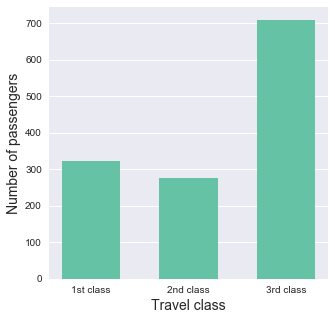

In [436]:
class_data = titanic_data.pclass.value_counts().sort_index()
class_data = class_data.rename(index={1:'1st class', 2:'2nd class', 3:'3rd class'})
pretty_bar(class_data.tolist(), class_data.index, 'Travel class', 'Number of passengers')

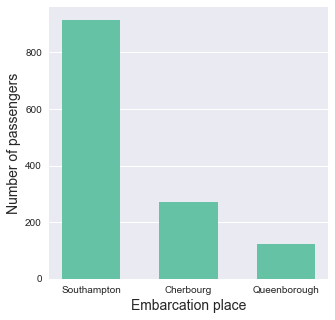

In [437]:
embarcation_data = titanic_data.embarked.value_counts()
embarcation_data = embarcation_data.rename(index={'S':'Southampton', 'C':'Cherbourg', 'Q':'Queenborough'})
pretty_bar(embarcation_data.tolist(), embarcation_data.index, 'Embarcation place', 'Number of passengers')

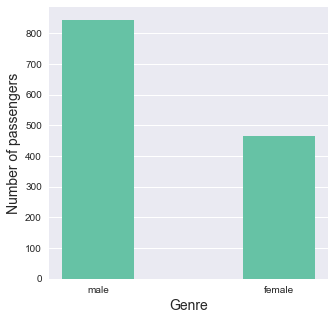

In [438]:
sex_data = titanic_data.sex.value_counts()
pretty_bar(sex_data.tolist(), sex_data.index, 'Genre', 'Number of passengers', width=0.4)

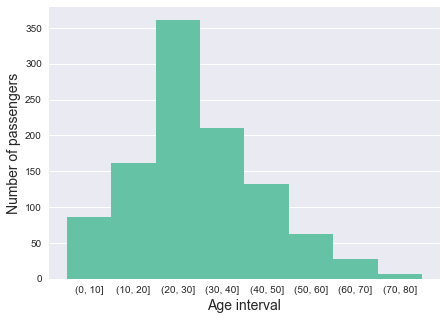

In [439]:
sorted_titanic_data = titanic_data.sort_values(by=['age'])
age_data = pd.cut(sorted_titanic_data.age, range(0,90,10)).value_counts().sort_index()
pretty_bar(age_data.tolist(), age_data.index, 'Age interval', 'Number of passengers', width=1.0, figwidth=7)

## Solution 3
Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

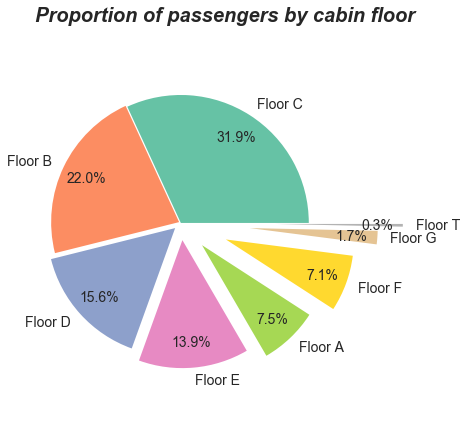

In [440]:
v = titanic_data.cabin.str[0].value_counts()
l = titanic_data.cabin.str[0].value_counts().index
    
# Relabel the categories
l = ['Floor '+str(k) for k in l]

pretty_pie('Proportion of passengers by cabin floor', v, l)

## Solution 4
For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

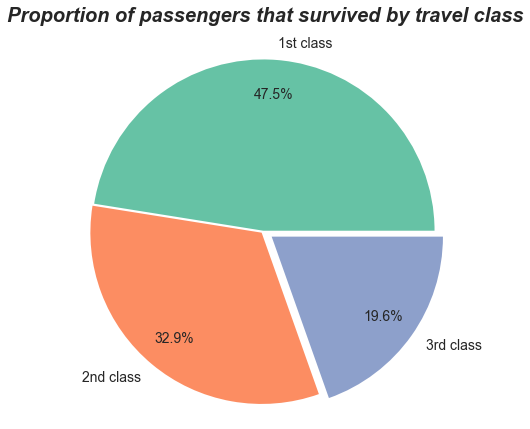

In [441]:
survivors_df = titanic_data[['pclass', 'survived']]

# Divide the number of survivor of each class by the respective number of passengers for each class
survivors_df = survivors_df.groupby('pclass').sum().div(
    survivors_df.pclass.value_counts().sort_index(), axis=0)

survivors_df = survivors_df.rename(index={1:'1st class', 2:'2nd class', 3:'3rd class'}, level=0)

pretty_pie('Proportion of passengers that survived by travel class', survivors_df, survivors_df.index)

## Solution 5

Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

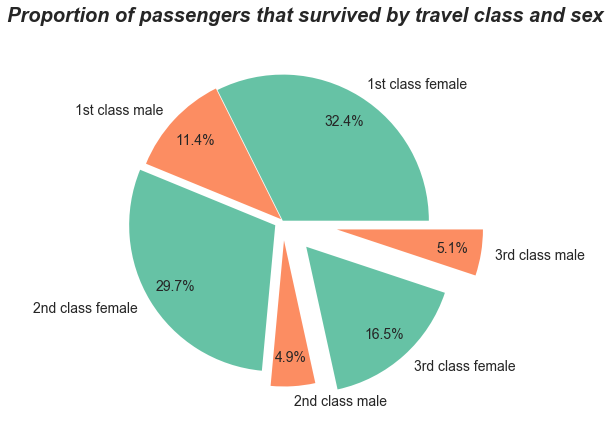

In [452]:
titanic_data['survived'] = titanic_data['survived'].astype(float)
titanic_data['pclass'] = titanic_data['pclass'].astype(float)

survivors_df = titanic_data[['pclass', 'survived', 'sex']]

df = survivors_df.groupby(['pclass', 'sex']).agg(['sum', 'count'])
df.columns = df.columns.droplevel()

df['ratio'] = df['sum'] / df['count']
df = df.rename(index={1:'1st class', 2:'2nd class', 3:'3rd class'}, level=0)

# Aggregate the column index to create a meaningful label for the plot
df = df.reset_index()
df.pclass = df.pclass.astype(str)
df.sex = df.sex.astype(str)
df['Category'] = df.pclass.astype(str).str.cat(' ' + df.sex.astype(str))
df = df.drop(['pclass', 'sex'], axis=1)
df = df.set_index('Category')

pretty_pie('Proportion of passengers that survived by travel class and sex', df.ratio, df.index, num_colors=2)

## Solution 6
Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In [453]:
titanic_data['survived'] = titanic_data['survived'].astype(float)
titanic_data['pclass'] = titanic_data['pclass'].astype(float)

df = titanic_data.copy()
# Separates into two equally populated groups
df['Age category'] = pd.qcut(df.age, 2, labels=['young', 'old'])
df = df[['Age category', 'pclass', 'survived', 'sex']]

# Group and count
df = df.groupby(['Age category', 'pclass', 'sex']).agg(['sum', 'count'])

df['ratio'] = df.survived['sum'] / df.survived['count']
df.columns = df.columns.droplevel(level=1)

# Retain only relevant data
df = df[['ratio']]

display(df)

ratio
Age category pclass sex             
old          1.0    female  0.967391
                    male    0.302521
             2.0    female  0.872340
                    male    0.083333
             3.0    female  0.372093
                    male    0.144000
young        1.0    female  0.951220
                    male    0.531250
             2.0    female  0.910714
                    male    0.216216
             3.0    female  0.513761
                    male    0.183036